In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm)



In [2]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [3]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [4]:
# the shape of the matrix data representation
q.shape

(2, 1)

In [5]:
# the matrix data itself. in sparse matrix format.
q.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [6]:
# get the dense matrix representation
q.full()

array([[1.+0.j],
       [0.+0.j]])

In [7]:
# some additional properties
q.isherm, q.type

(False, 'ket')

In [10]:
sy = Qobj([[0, -1j], [1j, 0]])  # the sigma-y Pauli operator

sy.full()


array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [12]:
sz = Qobj([[1, 0], [0, -1]])  # the sigma-z Pauli operator

sz.full()


array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [14]:
# some arithmetic with quantum objects

H = 1.0 * sz + 0.1 * sy

print("Qubit Hamiltonian = \n")
H.full()

Qubit Hamiltonian = 



array([[ 1.+0.j ,  0.-0.1j],
       [ 0.+0.1j, -1.+0.j ]])

In [17]:
# The hermitian conjugate
sy.dag().full()


array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [18]:
H.tr()

0.0

In [19]:
#Eigen energies of a 2-level system
H.eigenenergies()

array([-1.00498756,  1.00498756])

In [20]:
# Fundamental basis states (Fock states of oscillator modes)

N = 2  # number of states in the Hilbert space
n = 1  # the state that will be occupied

basis(N, n)  # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [22]:
fock(4, 2).full()  # another example

array([[0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j]])

In [24]:
# a coherent state
coherent_state = coherent(N = 10, alpha = 1.0)
coherent_state.full()

array([[0.60653066+0.j],
       [0.60653066+0.j],
       [0.42888194+0.j],
       [0.24761511+0.j],
       [0.12380753+0.j],
       [0.0553686 +0.j],
       [0.02260303+0.j],
       [0.00854887+0.j],
       [0.00299672+0.j],
       [0.00110007+0.j]])

In [25]:
# a fock state as density matrix
fock_dm(5, 2)  # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [27]:
# coherent state as density matrix
coherent_dm(N=8, alpha=1.0).full()

array([[3.67879439e-01+0.j, 3.67879455e-01+0.j, 2.60129900e-01+0.j,
        1.50187300e-01+0.j, 7.50858773e-02+0.j, 3.36199110e-02+0.j,
        1.35485515e-02+0.j, 5.77267786e-03+0.j],
       [3.67879455e-01+0.j, 3.67879470e-01+0.j, 2.60129911e-01+0.j,
        1.50187306e-01+0.j, 7.50858804e-02+0.j, 3.36199124e-02+0.j,
        1.35485520e-02+0.j, 5.77267810e-03+0.j],
       [2.60129900e-01+0.j, 2.60129911e-01+0.j, 1.83939513e-01+0.j,
        1.06198399e-01+0.j, 5.30937031e-02+0.j, 2.37728537e-02+0.j,
        9.58026722e-03+0.j, 4.08189737e-03+0.j],
       [1.50187300e-01+0.j, 1.50187306e-01+0.j, 1.06198399e-01+0.j,
        6.13141770e-02+0.j, 3.06539153e-02+0.j, 1.37253761e-02+0.j,
        5.53121524e-03+0.j, 2.35670388e-03+0.j],
       [7.50858773e-02+0.j, 7.50858804e-02+0.j, 5.30937031e-02+0.j,
        3.06539153e-02+0.j, 1.53253712e-02+0.j, 6.86197771e-03+0.j,
        2.76532136e-03+0.j, 1.17822997e-03+0.j],
       [3.36199110e-02+0.j, 3.36199124e-02+0.j, 2.37728537e-02+0.j,
       

In [28]:
# thermal state
n = 1  # average number of thermal photons
thermal_dm(8, n)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]

In [30]:
# Pauli sigma x
sigmax().full()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [31]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [32]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [37]:
#  annihilation operator

destroy(N=8)  # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [44]:
# creation operator

create(N=4).full()  # equivalent to destroy(5).dag()

array([[0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [1.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 1.41421356+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 1.73205081+0.j, 0.        +0.j]])

In [47]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)

x = a + a.dag()

print(x)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]


In [48]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

In [50]:
a = destroy(5)

commutator(a, a.dag()).full()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -4.+0.j]])

In [51]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

In [52]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [53]:
len(result.states)

100

In [55]:
result.states[-1].full()  # the finial state

array([[-0.8390774+0.j        ],
       [ 0.       +0.54401206j]])

In [56]:
expect(sigmaz(), result.states[-1])

0.40810176186453223

In [57]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

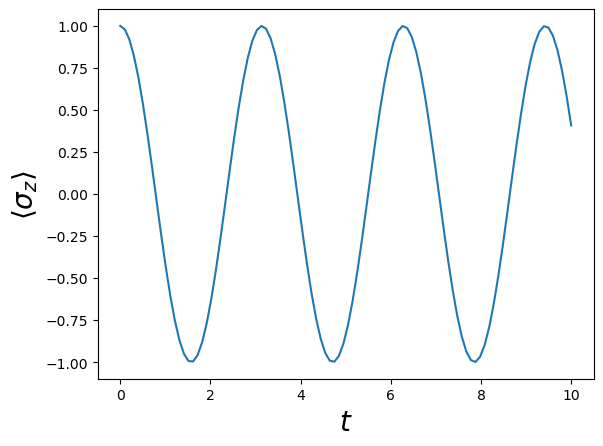

In [58]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

In [59]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

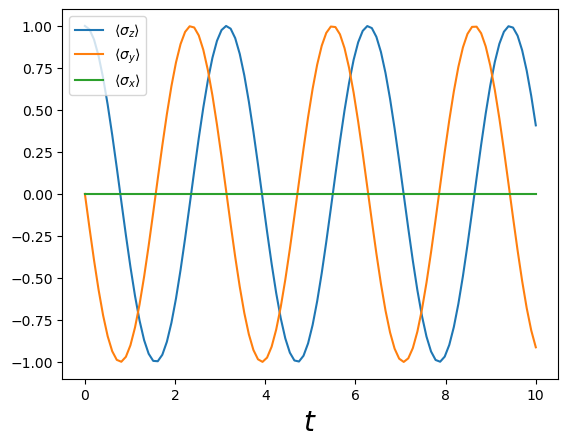

In [60]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, result.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(tlist, result.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(tlist, result.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2);

In [61]:
w = 1.0  # oscillator frequency
kappa = 0.1  # relaxation rate
a = destroy(10)  # oscillator annihilation operator
rho0 = fock_dm(10, 5)  # initial state, fock state with 5 photons
H = w * a.dag() * a  # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [62]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value
# of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a])

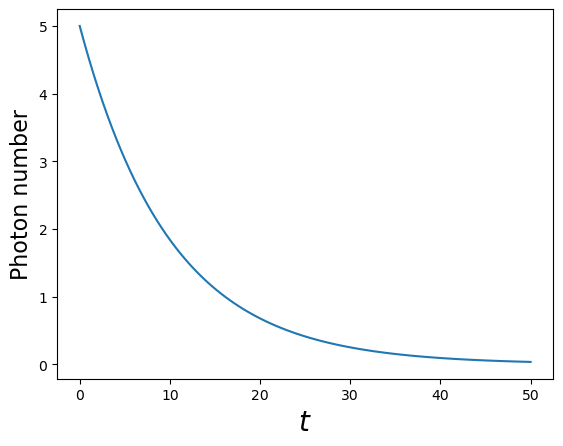

In [63]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);